### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Check the shape of the data
df.shape

(1898, 9)

#### Observations:
The DataFrame has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There is no null value because data has 1898 non-null observartions in each of columns.
* The data set contains 9 columns : 4 are of integer type (order_id, customer_id, food_preparation_time,delivery_time),1 is of floating point type (cost_of_the_order), and 4 are of the general object type(restaurant_name,cost_of_the_order, day_of_the_week,rating)
* total memory is approx. 133.6

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# to check the missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
No missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# to get summary statistics of numerical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
- Order ID and Customer ID are identifiers for  each order.
- The cost of and order ranges from 4.47 to 35.41 dollars, with an average order costing around 16 dollars, standard deviation of 7.5 dollars. The cost of 75% of the orders are below 23 dollars. This indicates that the most of the customers prefer low-cost food compated to the expensive ones.
- Food preparation time ranges from 20 to 35 min, with an average of around 27 min and standard deviation of 4.6 min.
- Delivery time ranges from 15 to 33 minutes, with an average of around 24 minutes and standard deviation of 5 min.


In [11]:
# to get summary statistics of all data
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


### **Question 5:** How many orders are not rated? [1 mark]

In [16]:
#to find not given rating count
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
- 736 ratings ara not rated by customers.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [19]:
# to check unique order ID
df['order_id'].nunique()


1898

- There are 1898 different orders

In [20]:
# to check unique customer_id
df['customer_id'].nunique()

1200

- There are 1200 different customer. That's mean some of the customers place order more than once.

In [21]:
# to check unique restorant names
df['restaurant_name'].nunique()

178

- There are 178 different restaurants in this dataset.

In [22]:
# to check the cuisine types
df['cuisine_type'].nunique()

14

- There are 14 different cuisine types in this dataset.

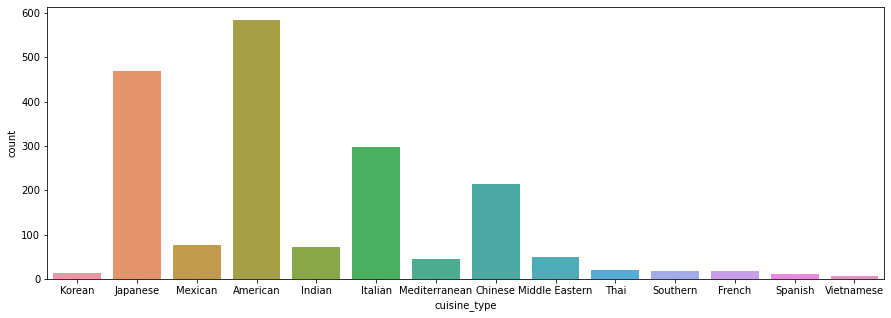

In [26]:
# to see the cuisine types on countplot using visualzation.
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cuisine_type');

- The most frequent cuisine type is American followed by Japanese, Italian and Chinese.
- The least popular one is Vietnamese type of cuisine.


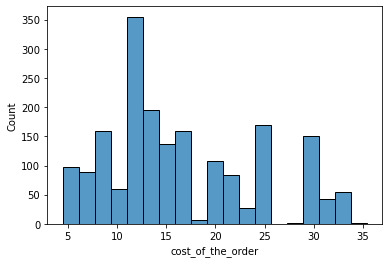

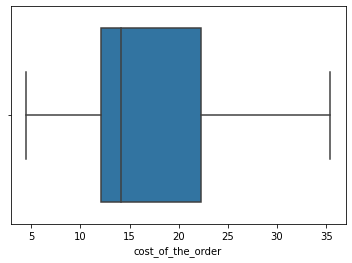

In [29]:
#to see the cost of orders using visualzation
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

- The avarage cost of the order is greater that the median cost indicating that the distribution for the order is right-skewed.
- The mode of the distribution indicates that a large number of custumers prefer to order food costs around 10-12 dollars.
- There are a few orders that costs grater than 30 dollars. 

In [31]:
# to check the unique values of day_of _the_week columns
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

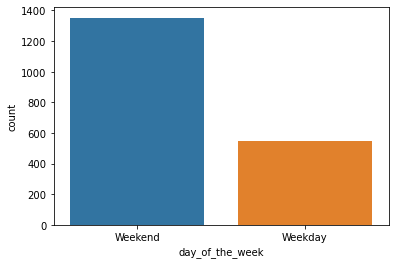

In [33]:
sns.countplot(data=df, x='day_of_the_week')
plt.show()

- The 'day_of_the_week' columns consists of 2 unique values - Weekend and Weekday
- The distrubution shows that number of the order placed on Weekends is approx. more double the number of the order placed on weekday.

In [34]:
# to check the unique values of rating columns
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

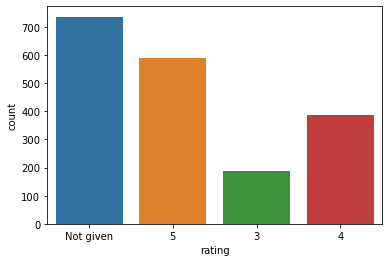

In [35]:
sns.countplot(data=df,x='rating')
plt.show()

- Most frequent rating is 'Not given',followed by a rating of 5, 4, 3

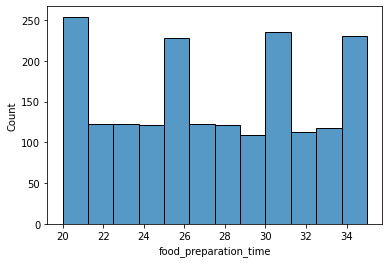

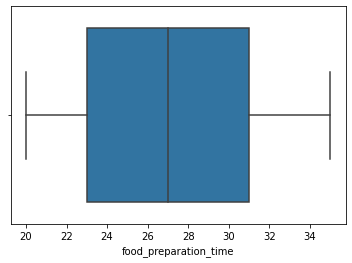

In [36]:
#to see the food preparetion time of orders using visualzation
sns.histplot(data=df, x='food_preparation_time')
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

- The food preparation time is pretty evenly distributed between 20 and 35 min
- There is no outliers in this column.

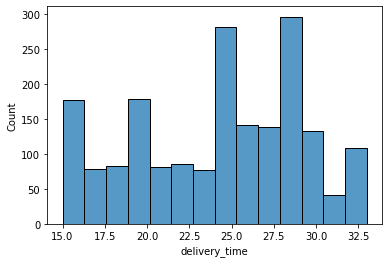

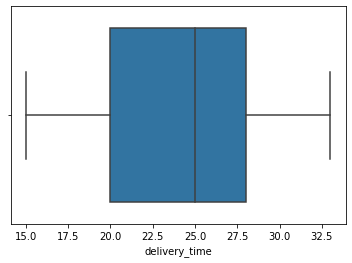

In [37]:
#to see the delivery time of orders using visualzation
sns.histplot(data=df,x='delivery_time') 
plt.show()
sns.boxplot(data=df,x='delivery_time') 
plt.show()

- More number of orders have delivery time between 25 and 30 min.
- There are no outlier in this column.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [42]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts()[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: 
- Top 5 restaurants in terms of the number of orders received is above


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [46]:
# Get most popular cuisine on Weekends
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()[:1]

American    415
Name: cuisine_type, dtype: int64

#### Observations:
- American cuisine is the most popular cuisine on weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [47]:
# To get orders that cost more than 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] 

print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# calculate the percentage
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
- There are a total orders that cost above $20 is : 555
- Percentage of orders above  20 dollars : 29.24 %


### **Question 10**: What is the mean order delivery time? [1 mark]

In [49]:
# to get the mean delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations:
- The avarage delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [50]:
# to find the top 3 most frequent customers
df['customer_id'].value_counts()[:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
- These 3 customers are top 3 most frequent customers

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


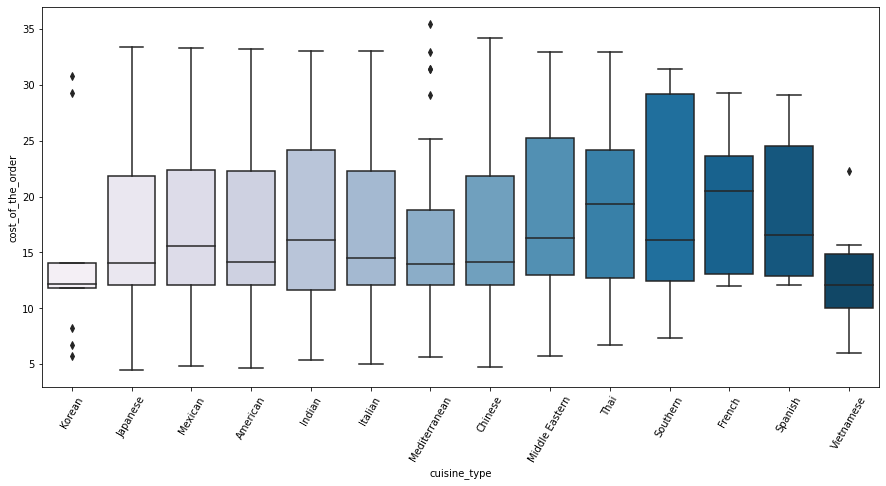

In [51]:
# Relationship between Cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

- Korean and Vietnamese cuisines cost less compated to other cuisines
- Some outliers present for the cost of Korean, Mediterranean and Vietnamese cuisines
- French and Spanish cuisines are expensive compared to the other cuisines base costs.

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "delivery_time", y = "day_of_the_week", data = df, palette = 'PuBu') 
plt.show()

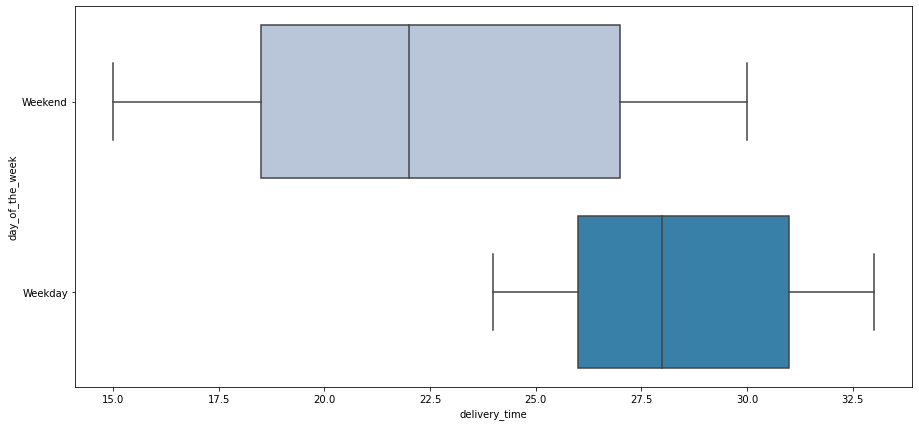

In [53]:
# Relationship between delivery_time and day_of_the_week columns
plt.figure(figsize=(15,7))
sns.boxplot(x = "delivery_time", y = "day_of_the_week", data = df, palette = 'PuBu') 
plt.show()

- Weekends orders deliver faster than weekdays.
- Approx 75% of Weekends orders deliver less than 26 minutes. 

In [66]:
# Revenue Generated by the Restaurants
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending= False).head(15)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Momoya                            492.13
Name: cost_of_the_order, dtype: float64

- The above 14 restaurants aregenerating more than 500 dollars revenue.

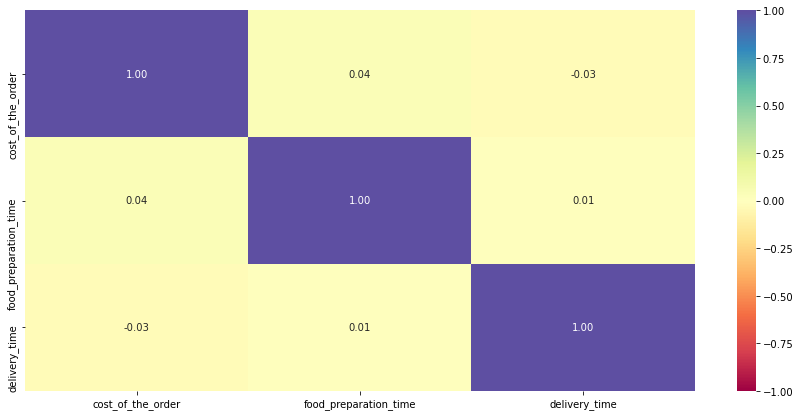

In [67]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

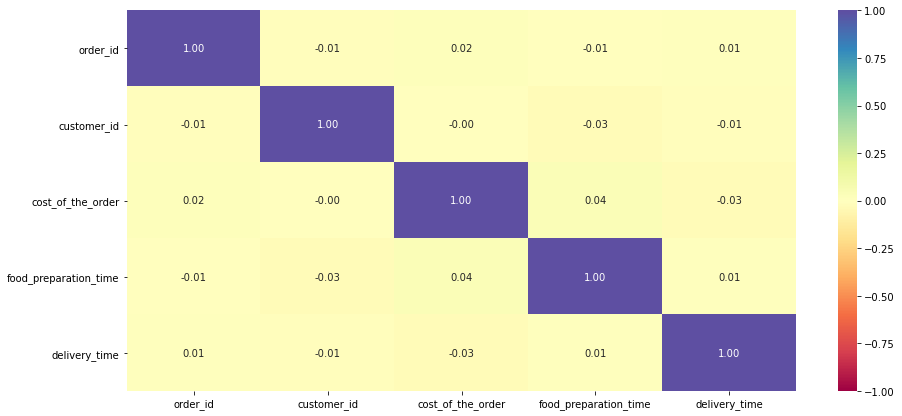

In [68]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

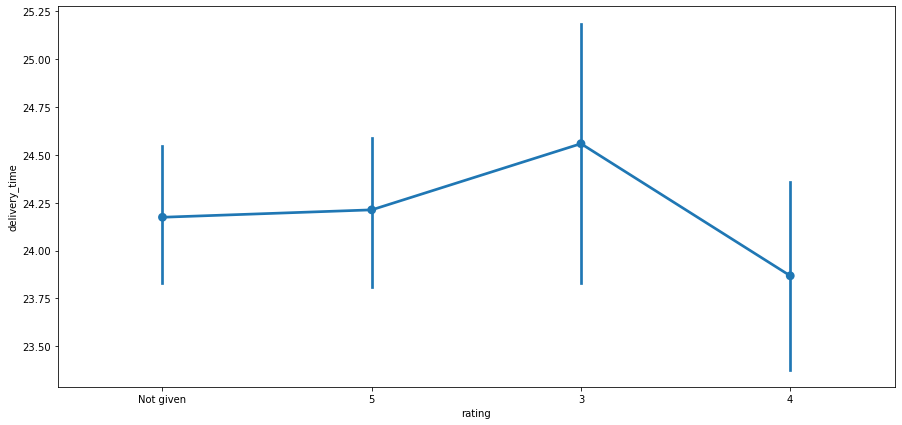

In [69]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

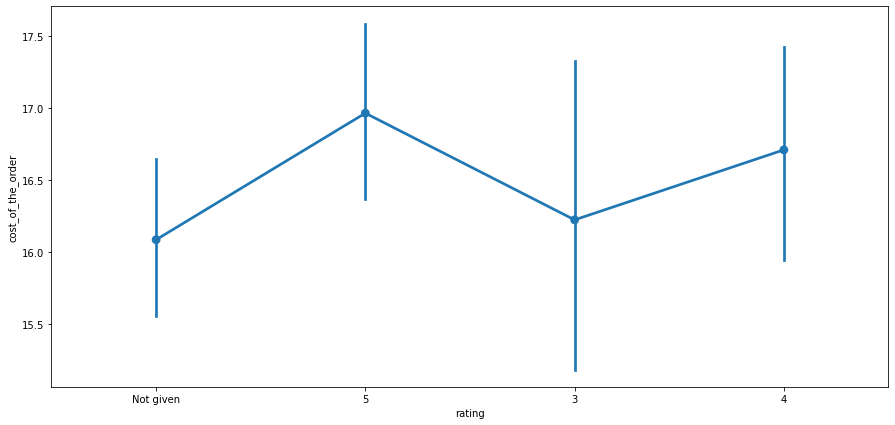

In [70]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

- It seems delivery time and cost of the order play a slight role in low rating of the orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [75]:
# Filter the rated restaurants
df_rated= df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count= df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending= False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [78]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count.rating>50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50
rest_names

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [80]:

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
df_mean_4

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30
...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25


In [81]:
# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
As you see the 4 restaurants on the list are fulfilling the criteria to get the promotional offer. Their name 

1.   The Meatball Shop
2.   Blue Ribbon Fried Chicken
3.   Shake Shack
4.   Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [82]:
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [83]:
total_rev = df['Revenue'].sum() 
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
Revenue column generated and added at the end of the column list. Then Total renevue calculated.
The net revenue is around 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [84]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

df_greater_than_60 = df[df['total_time']>60]
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders that have more than 60 minutes of total delivery time:", round(percentage, 2), '%')

Percentage of orders that have more than 60 minutes of total delivery time: 10.54 %


#### Observations:
- Approx. 90% of the orders are delivered less than 60 minutes.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [85]:
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:
- Weekends orders are delivered faster than Weekdays on the average.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* The mean cost of orders is determined to be approximately 16.498851 dollars. Of the various cuisines offered, American, Japanese, Italian, and Chinese are the most popular among customers. It has been observed that a staggering 90% of orders are delivered to customers within 60 minutes or less. A strong correlation between revenue and order cost has been established. However, no significant correlation was found to exist between the columns within the dataset. A notable issue is the prevalence of "Not given" ratings, with 736 out of 1898 ratings falling under this category. It has been determined that delivery time exerts a significant influence on customer ratings, with longer delivery times resulting in a greater proportion of 3 out of 5 ratings. Furthermore, it has been observed that orders placed on weekends tend to be delivered faster, with an average delivery time of 22 minutes, as opposed to the average of 28 minutes for orders placed on weekdays.

### Recommendations:

*  Strategies such as offering incentives for less popular cuisine options may be implemented to stimulate demand for those specific dishes, thus increasing overall orders for those types of cuisine. Additionally, minimizing delivery time across all days, not solely weekends, could lead to an increase in customer satisfaction and ultimately drive customer acquisition. Furthermore, encouraging customers to provide ratings for their orders could aid in identifying patterns and trends within the data, ultimately allowing for more effective and efficient optimization of the company's model. Furthermore, given the diverse culinary landscape of New York City, the company could consider expanding its offerings to include a wider range of cuisines, thus catering to a broader customer base and ultimately driving an increase in orders.

---